# Cloning dataset

In [ ]:
# This is our GitHub repository, all datasets are included in this repo
!git clone https://github.com/Alvin-Tan-Yi-Tung/Animal_Disease_Prediction.git

fatal: destination path 'Animal_Disease_Prediction' already exists and is not an empty directory.


# Data Preparation

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Animal_Disease_Prediction/backend/wahis_outbreak_details.csv")
df

,country,location,lat_long,start_date,end_date,cases,deaths
0,Armenia,Sardarapat,"40.1239 , 44.0044",2025/08/04,2025/08/05,1,1
1,Armenia,Aygeshat,"40.227 , 44.2855",2025/07/29,2025/07/30,1,1
2,Namibia,Walvisbay Lagoon,"-22.96348 , 14.48727",2025/06/16,-,-,1
3,Thailand,Si Sa Ket,"14.951072 , 104.331852",2025/06/30,-,1,1
4,Thailand,Nakhon Ratchasima,"15.552079 , 102.777379",2025/06/23,-,1,1
...,...,...,...,...,...,...,...
2195,France,FONTENAY LE COMTE,"46.45964911 , -0.78859276",2007/11/23,2007/11/29,1,1
2196,Ecuador,San Juan de Bellavista,"-3.41489966 , -79.35188579",2007/03/12,2007/06/01,1,1
2197,Ecuador,Quebrada Honda,"-3.40597651 , -79.35171856",2007/02/20,2007/06/01,1,1
2198,Ecuador,San Carlos,"-0.19417301 , -76.51244951",2007/03/06,2007/08/17,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2200 non-null   object
 1   location    2200 non-null   object
 2   lat_long    2200 non-null   object
 3   start_date  2200 non-null   object
 4   end_date    2200 non-null   object
 5   cases       2200 non-null   object
 6   deaths      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert dates (string dates to datetime objects & missing end dates become NaT)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Handle ongoing outbreaks (to indicate whether the outbreak is still active or not)
df['is_ongoing'] = df['end_date'].isna()

# Calculate the duration of on-going outbreak (output is integer days)
df['duration'] = (df['end_date'].fillna(pd.Timestamp.today()) - df['start_date']).dt.days

# Extract location features (split into two float columns)
df[['latitude', 'longitude']] = df['lat_long'].str.split(',', expand=True).astype(float)

# Convert cases and deaths to numeric
df['cases'] = pd.to_numeric(df['cases'], errors='coerce')
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')

# Fill the "-" with 0
df['cases'] = df['cases'].fillna(0)
df['deaths'] = df['deaths'].fillna(0)

# Feature engineering
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['week'] = df['start_date'].dt.isocalendar().week

# Country encoding
country_encoder = LabelEncoder()
df['country_code'] = country_encoder.fit_transform(df['country'])

print(df.head().to_string())

    country           location                lat_long start_date   end_date  cases  deaths  is_ongoing  duration   latitude   longitude  year  month  week  country_code
0   Armenia         Sardarapat       40.1239 , 44.0044 2025-08-04 2025-08-05    1.0     1.0       False         1  40.123900   44.004400  2025      8    32             2
1   Armenia           Aygeshat        40.227 , 44.2855 2025-07-29 2025-07-30    1.0     1.0       False         1  40.227000   44.285500  2025      7    31             2
2   Namibia   Walvisbay Lagoon    -22.96348 , 14.48727 2025-06-16        NaT    0.0     1.0        True        71 -22.963480   14.487270  2025      6    25            34
3  Thailand          Si Sa Ket  14.951072 , 104.331852 2025-06-30        NaT    1.0     1.0        True        57  14.951072  104.331852  2025      6    27            44
4  Thailand  Nakhon Ratchasima  15.552079 , 102.777379 2025-06-23        NaT    1.0     1.0        True        64  15.552079  102.777379  2025      6 

In [ ]:
# View the data types of columns (after preprocessing)
print(df.dtypes)

country                 object
location                object
lat_long                object
start_date      datetime64[ns]
end_date        datetime64[ns]
cases                  float64
deaths                 float64
is_ongoing                bool
duration                 int64
latitude               float64
longitude              float64
year                     int32
month                    int32
week                    UInt32
country_code             int64
dtype: object


In [ ]:
# View missing values for each column
print(df.isna().sum())

country           0
location          0
lat_long          0
start_date        0
end_date        336
cases             0
deaths            0
is_ongoing        0
duration          0
latitude          0
longitude         0
year              0
month             0
week              0
country_code      0
dtype: int64


In [ ]:
# View the encoder of country
print(f"Encoded {len(country_encoder.classes_)} countries:")
print(country_encoder.classes_[:])

Encoded 48 countries:
['Albania' 'Argentina' 'Armenia' 'Bangladesh' 'Belgium' 'Bhutan'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Cambodia' 'Canada' 'Ceuta'
 'Chile' 'Chinese Taipei' 'Congo (Rep. of the)' 'Ecuador' 'Egypt'
 'El Salvador' 'Finland' 'France' 'French Guiana' 'Germany' 'Greece'
 'Honduras' 'Hungary' 'Indonesia' 'Italy' 'Kazakhstan' 'Liberia' 'Libya'
 'Lithuania' 'Malaysia' 'Melilla' 'Moldova' 'Myanmar' 'Namibia'
 'Netherlands' 'Nigeria' 'North Macedonia' 'Norway' 'Palestine' 'Slovakia'
 'South Africa' 'Spain' 'Sweden' 'Thailand' 'Timor-Leste'
 'United States of America' 'Uruguay']


# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- helpers ---
def _freq_from_interval(interval: str) -> str:
    interval = interval.lower()
    if interval == "weekly":
        return "W"     # week-end frequency
    if interval == "monthly":
        return "ME"     # month-end
    if interval == "annually":
        return "YE-DEC" # year-end (December)
    raise ValueError("interval must be one of: 'weekly', 'monthly', 'annually'")


# --- main builder: uniform panel with zero-fill for missing periods ---
def build_regular_panel(
    df: pd.DataFrame,
    interval: str = "weekly",
    start_date: str | pd.Timestamp | None = None,
    end_date: str | pd.Timestamp | None = None,
    country_col: str = "country",
    target_col: str = "outbreak_count",
    countries_list: list[str] | None = None
) -> tuple[pd.DataFrame, pd.DatetimeIndex, LabelEncoder]:
    """
    Returns a panel with identical timeline for each country:
      columns: [country, start_date, outbreak_count, country_id]
      every (country, start_date) exists; missing periods are filled with 0.
    """
    df = df.copy()
    df["start_date"] = pd.to_datetime(df["start_date"])

    # Step 1: If outbreak_count not in df, assign 1 for each outbreak record
    if target_col not in df.columns:
        df[target_col] = 1

    # Keep only needed columns
    needed = [country_col, "start_date", target_col]
    missing = [c for c in needed if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    # Optionally restrict to a known set of countries
    if countries_list is not None:
        df = df[df[country_col].isin(countries_list)].copy()

    # Determine global date range
    global_min = df["start_date"].min() if start_date is None else pd.to_datetime(start_date)
    global_max = df["start_date"].max() if end_date   is None else pd.to_datetime(end_date)
    if pd.isna(global_min) or pd.isna(global_max):
        raise ValueError("No dates found in df after filtering.")

    freq = _freq_from_interval(interval)
    full_range = pd.date_range(start=global_min, end=global_max, freq=freq)

    # Step 2: Aggregate outbreaks into the chosen frequency
    grouped = (
        df
        .groupby([country_col, pd.Grouper(key="start_date", freq=freq)])[target_col]
        .sum()
        .rename(target_col)
        .to_frame()
    )

    # Build full index (every country x every start_date in full_range)
    countries = countries_list if countries_list is not None else sorted(df[country_col].unique())
    full_index = pd.MultiIndex.from_product([countries, full_range], names=[country_col, "start_date"])

    panel = (
        grouped
        .reindex(full_index, fill_value=0)  # enforce identical length + fill missing with 0
        .reset_index()
    )

    # Encode countries
    le = LabelEncoder()
    panel["country_id"] = le.fit_transform(panel[country_col])

    return panel, full_range, le


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_global_lstm_sequences_from_panel(
    panel: pd.DataFrame,
    time_steps: int = 12,
    target_col: str = "outbreak_count",
    country_id_col: str = "country_id",
    start_col: str = "start_date"
) -> tuple[np.ndarray, np.ndarray, np.ndarray, MinMaxScaler]:
    """
    Prepares sequences with both outbreak counts and country_id.

    Returns:
      X   : (samples, time_steps, 2) → [scaled outbreak_count, country_id]
      y   : (samples,)
      scaler : fitted scaler for outbreak_count
    """
    panel = panel.copy()
    panel[start_col] = pd.to_datetime(panel[start_col])

    # Scale outbreak counts
    scaler = MinMaxScaler()
    panel["target_scaled"] = scaler.fit_transform(panel[[target_col]])

    X, y = [], []

    # Process per country (to keep time ordering intact)
    for cid, grp in panel.groupby(country_id_col, sort=True):
        grp = grp.sort_values(start_col)
        cases = grp["target_scaled"].to_numpy()
        country_ids = grp[country_id_col].to_numpy()

        if len(cases) <= time_steps:
            continue

        for i in range(len(cases) - time_steps):
            seq_cases = cases[i:i+time_steps]
            seq_cids = country_ids[i:i+time_steps]

            # Stack into (time_steps, 2)
            seq = np.stack([seq_cases, seq_cids], axis=-1)
            X.append(seq)
            y.append(cases[i+time_steps])  # predict next outbreak_count

    X = np.asarray(X, dtype=np.float32)
    y = np.asarray(y, dtype=np.float32)
    return X, y, scaler


# Split the dataset

In [ ]:
# 1) Build uniform panel (choose interval + global date range)
countries_48 = [
 'Albania','Argentina','Armenia','Bangladesh','Belgium','Bhutan',
 'Bosnia and Herzegovina','Burkina Faso','Cambodia','Canada','Ceuta',
 'Chile','Chinese Taipei','Congo (Rep. of the)','Ecuador','Egypt',
 'El Salvador','Finland','France','French Guiana','Germany','Greece',
 'Honduras','Hungary','Indonesia','Italy','Kazakhstan','Liberia','Libya',
 'Lithuania','Malaysia','Melilla','Moldova','Myanmar','Namibia',
 'Netherlands','Nigeria','North Macedonia','Norway','Palestine','Slovakia',
 'South Africa','Spain','Sweden','Thailand','Timor-Leste',
 'United States of America','Uruguay'
]

# --- Weekly sequences ---
panel_weekly, full_range_weekly, label_encoder_weekly = build_regular_panel(
    df,
    interval="weekly",
    country_col="country",
    target_col="outbreak_count",   # <<< outbreak target
    countries_list=countries_48
)
X_weekly, y_weekly, scaler_weekly = create_global_lstm_sequences_from_panel(
    panel_weekly,
    time_steps=24,
    target_col="outbreak_count",
    country_id_col="country_id"
)
print("Weekly sequences:")
print("X_weekly:", X_weekly.shape)
print("y_weekly:", y_weekly.shape)
print("-" * 20)

# --- Monthly sequences ---
panel_monthly, full_range_monthly, label_encoder_monthly = build_regular_panel(
    df,
    interval="monthly",
    country_col="country",
    target_col="outbreak_count",
    countries_list=countries_48
)
X_monthly, y_monthly, scaler_monthly = create_global_lstm_sequences_from_panel(
    panel_monthly,
    time_steps=12,
    target_col="outbreak_count",
    country_id_col="country_id"
)
print("Monthly sequences:")
print("X_monthly:", X_monthly.shape)
print("y_monthly:", y_monthly.shape)
print("-" * 20)

# --- Annually sequences ---
panel_annually, full_range_annually, label_encoder_annually = build_regular_panel(
    df,
    interval="annually",
    country_col="country",
    target_col="outbreak_count",
    countries_list=countries_48
)
X_annually, y_annually, scaler_annually = create_global_lstm_sequences_from_panel(
    panel_annually,
    time_steps=5,
    target_col="outbreak_count",
    country_id_col="country_id"
)
print("Annually sequences:")
print("X_annually:", X_annually.shape)
print("y_annually:", y_annually.shape)
print("-" * 20)

# For downstream steps, keep monthly sequences
X_seq = X_monthly
y_seq = y_monthly
scaler = scaler_monthly
label_encoder = label_encoder_monthly
panel = panel_monthly


Weekly sequences:
X_weekly: (45072, 24, 2)
y_weekly: (45072,)
--------------------
Monthly sequences:
X_monthly: (10080, 12, 2)
y_monthly: (10080,)
--------------------
Annually sequences:
X_annually: (624, 5, 2)
y_annually: (624,)
--------------------


In [ ]:
# View the columns and head of the weekly panel DataFrame
print("Weekly Panel:")
print(panel_weekly.columns)
print(panel_weekly.head().to_string())
print("-" * 20)

# View the columns and head of the monthly panel DataFrame
print("Monthly Panel:")
print(panel_monthly.columns)
print(panel_monthly.head().to_string())
print("-" * 20)

# View the columns and head of the annually panel DataFrame
print("Annually Panel:")
print(panel_annually.columns)
print(panel_annually.head().to_string())
print("-" * 20)

Weekly Panel:
Index(['country', 'start_date', 'outbreak_count', 'country_id'], dtype='object')
   country start_date  outbreak_count  country_id
0  Albania 2007-02-25               0           0
1  Albania 2007-03-04               0           0
2  Albania 2007-03-11               0           0
3  Albania 2007-03-18               0           0
4  Albania 2007-03-25               0           0
--------------------
Monthly Panel:
Index(['country', 'start_date', 'outbreak_count', 'country_id'], dtype='object')
   country start_date  outbreak_count  country_id
0  Albania 2007-02-28               0           0
1  Albania 2007-03-31               0           0
2  Albania 2007-04-30               0           0
3  Albania 2007-05-31               0           0
4  Albania 2007-06-30               0           0
--------------------
Annually Panel:
Index(['country', 'start_date', 'outbreak_count', 'country_id'], dtype='object')
   country start_date  outbreak_count  country_id
0  Albania 2007-12-3

In [ ]:
# Save weekly panel data to CSV
panel_weekly.to_csv("panel_weekly.csv", index=False)
print("Weekly panel data saved to panel_weekly.csv")

# Save monthly panel data to CSV
panel_monthly.to_csv("panel_monthly.csv", index=False)
print("Monthly panel data saved to panel_monthly.csv")

# Save annually panel data to CSV
panel_annually.to_csv("panel_annually.csv", index=False)
print("Annually panel data saved to panel_annually.csv")

Weekly panel data saved to panel_weekly.csv
Monthly panel data saved to panel_monthly.csv
Annually panel data saved to panel_annually.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# --- Weekly data ---
try:
    panel_weekly = pd.read_csv("panel_weekly.csv")
    # Re-create sequences from loaded data
    X_weekly, y_weekly, scaler_weekly = create_global_lstm_sequences_from_panel(
        panel_weekly,
        time_steps=24,  # Adjusted time_steps for weekly data
        target_col="outbreak_count",
        country_id_col="country_id"
    )
    n_weekly = len(X_weekly)
    train_end_weekly = int(0.7 * n_weekly)
    val_end_weekly   = int(0.85 * n_weekly)

    X_train_weekly, y_train_weekly = X_weekly[:train_end_weekly], y_weekly[:train_end_weekly]
    X_val_weekly,   y_val_weekly   = X_weekly[train_end_weekly:val_end_weekly], y_weekly[train_end_weekly:val_end_weekly]
    X_test_weekly,  y_test_weekly  = X_weekly[val_end_weekly:], y_weekly[val_end_weekly:]

    print("Weekly Split:")
    print("Train:", X_train_weekly.shape, y_train_weekly.shape)
    print("Val  :", X_val_weekly.shape, y_val_weekly.shape)
    print("Test :", X_test_weekly.shape, y_test_weekly.shape)
    print("-" * 20)
except FileNotFoundError:
    print("panel_weekly.csv not found. Please run the cell to save the weekly panel data first.")
except Exception as e:
    print(f"An error occurred processing weekly data: {e}")


# --- Monthly data ---
try:
    panel_monthly = pd.read_csv("panel_monthly.csv")
    # Re-create sequences from loaded data
    X_monthly, y_monthly, scaler_monthly = create_global_lstm_sequences_from_panel(
        panel_monthly,
        time_steps=12,  # Adjusted time_steps for monthly data
        target_col="outbreak_count",
        country_id_col="country_id"
    )
    n_monthly = len(X_monthly)
    train_end_monthly = int(0.7 * n_monthly)
    val_end_monthly   = int(0.85 * n_monthly)

    X_train_monthly, y_train_monthly = X_monthly[:train_end_monthly], y_monthly[:train_end_monthly]
    X_val_monthly,   y_val_monthly   = X_monthly[train_end_monthly:val_end_monthly], y_monthly[train_end_monthly:val_end_monthly]
    X_test_monthly,  y_test_monthly  = X_monthly[val_end_monthly:], y_monthly[val_end_monthly:]

    print("Monthly Split:")
    print("Train:", X_train_monthly.shape, y_train_monthly.shape)
    print("Val  :", X_val_monthly.shape, y_val_monthly.shape)
    print("Test :", X_test_monthly.shape, y_test_monthly.shape)
    print("-" * 20)
except FileNotFoundError:
    print("panel_monthly.csv not found. Please run the cell to save the monthly panel data first.")
except Exception as e:
    print(f"An error occurred processing monthly data: {e}")


# --- Annually data ---
try:
    panel_annually = pd.read_csv("panel_annually.csv")
    # Re-create sequences from loaded data
    X_annually, y_annually, scaler_annually = create_global_lstm_sequences_from_panel(
        panel_annually,
        time_steps=5,  # Adjusted time_steps for annually data
        target_col="outbreak_count",
        country_id_col="country_id"
    )
    n_annually = len(X_annually)
    train_end_annually = int(0.7 * n_annually)
    val_end_annually   = int(0.85 * n_annually)

    X_train_annually, y_train_annually = X_annually[:train_end_annually], y_annually[:train_end_annually]
    X_val_annually,   y_val_annually   = X_annually[train_end_annually:val_end_annually], y_annually[train_end_annually:val_end_annually]
    X_test_annually,  y_test_annually  = X_annually[val_end_annually:], y_annually[val_end_annually:]

    print("Annually Split:")
    print("Train:", X_train_annually.shape, y_train_annually.shape)
    print("Val  :", X_val_annually.shape, y_val_annually.shape)
    print("Test :", X_test_annually.shape, y_test_annually.shape)
    print("-" * 20)
except FileNotFoundError:
    print("panel_annually.csv not found. Please run the cell to save the annually panel data first.")
except Exception as e:
    print(f"An error occurred processing annually data: {e}")


# Default → monthly
X_train, y_train = X_train_monthly, y_train_monthly
X_val,   y_val   = X_val_monthly,   y_val_monthly
X_test,  y_test  = X_test_monthly,  y_test_monthly
scaler = scaler_monthly
panel  = panel_monthly


Weekly Split:
Train: (31550, 24, 2) (31550,)
Val  : (6761, 24, 2) (6761,)
Test : (6761, 24, 2) (6761,)
--------------------
Monthly Split:
Train: (7056, 12, 2) (7056,)
Val  : (1512, 12, 2) (1512,)
Test : (1512, 12, 2) (1512,)
--------------------
Annually Split:
Train: (436, 5, 2) (436,)
Val  : (94, 5, 2) (94,)
Test : (94, 5, 2) (94,)
--------------------


# Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K # Import Keras backend

def build_global_lstm(
    seq_len: int,
    n_countries: int,
    emb_dim: int = 4,
    lstm_units: tuple = (128, 64),
    dense_units: tuple = (64, 32),
    dropout_rates: tuple = (0.3, 0.2, 0.2),
    learning_rate: float = 1e-3
) -> models.Model:
    """
    Build a global LSTM model with country embeddings.

    Args:
        seq_len (int): Length of input sequence (timesteps).
        n_countries (int): Total number of countries (for embedding layer).
        emb_dim (int): Dimension of the country embedding vector.
        lstm_units (tuple): Number of units in each LSTM layer.
        dense_units (tuple): Number of units in each Dense layer.
        dropout_rates (tuple): Dropout rates (lstm1, lstm2, dense).
        learning_rate (float): Learning rate for Adam optimizer.

    Returns:
        tf.keras.Model: Compiled LSTM model.
    """

    # Input: (batch, seq_len, 2) → [scaled outbreak_count, country_id]
    inputs = layers.Input(shape=(seq_len, 2))

    # Split features with explicit output_shape
    outbreak_seq = layers.Lambda(lambda x: x[:, :, 0:1], output_shape=(seq_len, 1))(inputs)  # (batch, seq_len, 1)
    # Use K.cast instead of tf.cast and specify output_shape
    country_seq = layers.Lambda(lambda x: K.cast(x[:, :, 1], dtype='int32'), output_shape=(seq_len,))(inputs)     # (batch, seq_len)

    # Embedding for country IDs
    country_emb = layers.Embedding(
        input_dim=n_countries,
        output_dim=emb_dim,
        mask_zero=False
    )(country_seq)  # (batch, seq_len, emb_dim)

    # Merge outbreak feature + country embedding
    merged = layers.Concatenate(axis=-1)([outbreak_seq, country_emb])

    # LSTM stack
    x = layers.LSTM(lstm_units[0], return_sequences=True)(merged)
    x = layers.Dropout(dropout_rates[0])(x)
    x = layers.LSTM(lstm_units[1])(x)
    x = layers.Dropout(dropout_rates[1])(x)

    # Dense layers
    for units in dense_units[:-1]:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(dropout_rates[2])(x)

    x = layers.Dense(dense_units[-1], activation="relu")(x)

    # Final regression output
    outputs = layers.Dense(1, activation="linear")(x)

    # Build & compile model
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss="mse",
        metrics=["mae", "mse"]
    )
    return model

# Assuming n_countries is defined elsewhere
# model = build_global_lstm(
#     seq_len=12,        # e.g., 12 weeks history
#     n_countries=n_countries,    # total number of countries
#     emb_dim=8,         # bigger embedding size
#     lstm_units=(128, 64),
#     dense_units=(64, 32),
#     dropout_rates=(0.3, 0.2, 0.2),
#     learning_rate=1e-3
# )

# model.summary()

In [ ]:
n_countries = panel["country_id"].nunique()

# Weekly model
weekly_model = build_global_lstm(
    seq_len=24,              # 12 weeks input
    n_countries=n_countries,
    emb_dim=8,
    lstm_units=(128, 64),
    dense_units=(64, 32),
    dropout_rates=(0.3, 0.2, 0.2),
    learning_rate=1e-3
)

# Monthly model
monthly_model = build_global_lstm(
    seq_len=12,              # 12 months input
    n_countries=n_countries,
    emb_dim=8,
    lstm_units=(128, 64),
    dense_units=(64, 32),
    dropout_rates=(0.3, 0.2, 0.2),
    learning_rate=1e-3
)

# Annual model
annual_model = build_global_lstm(
    seq_len=5,               # e.g. 5 years input
    n_countries=n_countries,
    emb_dim=4,
    lstm_units=(64, 32),     # smaller since less data
    dense_units=(32, 16),
    dropout_rates=(0.2, 0.2, 0.2),
    learning_rate=1e-3
)



In [ ]:
print(n_countries)

48


# Model Training

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)
]

# Train weekly model
weekly_history = weekly_model.fit(
    X_train_weekly, y_train_weekly,
    validation_data=(X_val_weekly, y_val_weekly),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Train monthly model
monthly_history = monthly_model.fit(
    X_train_monthly, y_train_monthly,
    validation_data=(X_val_monthly, y_val_monthly),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Train annual model
annual_history = annual_model.fit(
    X_train_annually, y_train_annually,
    validation_data=(X_val_annually, y_val_annually),
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/200
986/986 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 1.8370e-04 - mae: 0.0036 - mse: 1.8370e-04 - val_loss: 4.5362e-06 - val_mae: 6.5850e-04 - val_mse: 4.5362e-06 - learning_rate: 0.0010
Epoch 2/200
986/986 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.3397e-04 - mae: 0.0024 - mse: 1.3397e-04 - val_loss: 1.8073e-05 - val_mae: 0.0038 - val_mse: 1.8073e-05 - learning_rate: 0.0010
Epoch 3/200
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.9884e-04 - mae: 0.0026 - mse: 1.9884e-04 - val_loss: 6.2571e-06 - val_mae: 0.0016 - val_mse: 6.2571e-06 - learning_rate: 0.0010
Epoch 4/200
986/986 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.2299e-04 - mae: 0.0024 - mse: 1.2299e-04 - val_loss: 5.8661e-06 - val_mae: 0.0012 - val_mse: 5.8661e-06 - learning_rate: 0.0010
Epoch 5/200
986/986 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2740e-04 - mae: 0.0022 - mse: 1.2740e-04 - val_loss: 5.4663e-06 - val_mae: 0.0013 - val_mse: 5.4663e-06 - learning_rate: 0.0010
Epoch 6/200
986/986 ━━━━━━━━━━━━━━

# Model Evaluation

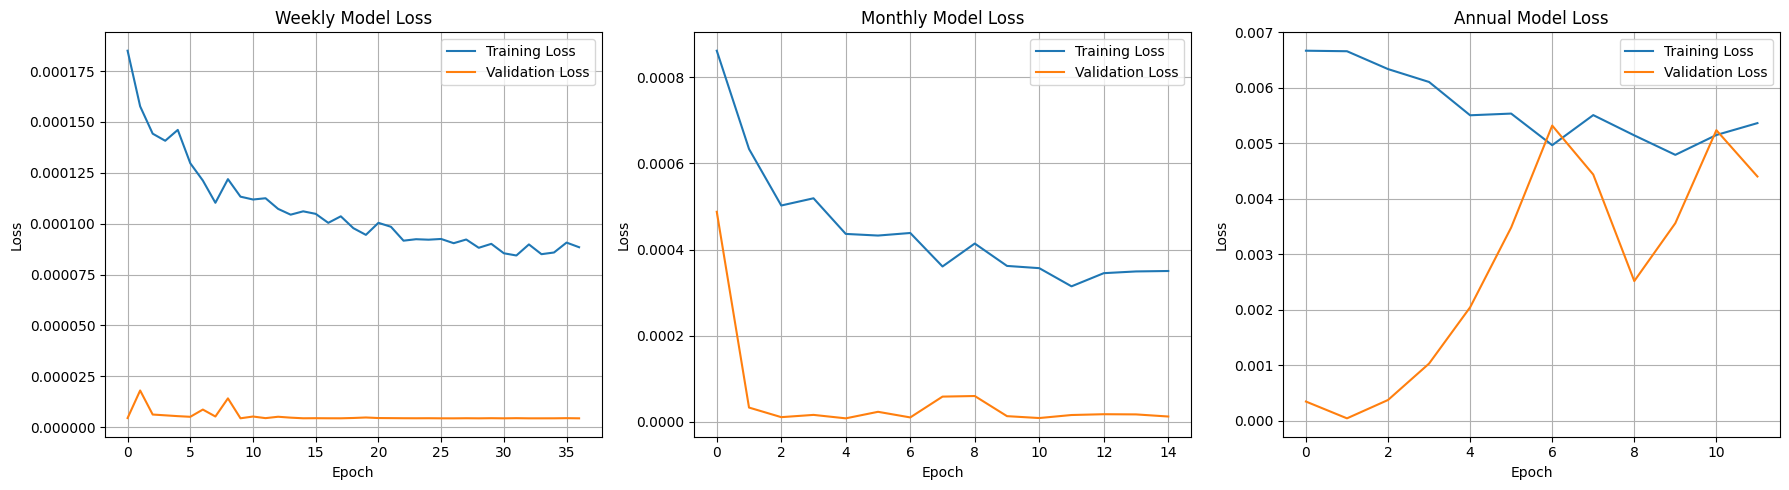

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot weekly model loss
axes[0].plot(weekly_history.history['loss'], label='Training Loss')
axes[0].plot(weekly_history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Weekly Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plot monthly model loss
axes[1].plot(monthly_history.history['loss'], label='Training Loss')
axes[1].plot(monthly_history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Monthly Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

# Plot annual model loss
axes[2].plot(annual_history.history['loss'], label='Training Loss')
axes[2].plot(annual_history.history['val_loss'], label='Validation Loss')
axes[2].set_title('Annual Model Loss')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# --- Weekly Model Evaluation ---
print("Weekly Model Evaluation:")
test_loss_weekly, test_mae_weekly, test_mse_weekly = weekly_model.evaluate(X_test_weekly, y_test_weekly, verbose=0)
print(f"Scaled → MAE={test_mae_weekly:.4f}, RMSE={np.sqrt(test_mse_weekly):.4f}")

y_pred_scaled_weekly = weekly_model.predict(X_test_weekly, verbose=0)
y_pred_weekly = scaler_weekly.inverse_transform(y_pred_scaled_weekly)
y_true_weekly = scaler_weekly.inverse_transform(y_test_weekly.reshape(-1, 1))

mae_weekly = np.mean(np.abs(y_pred_weekly - y_true_weekly))
rmse_weekly = np.sqrt(np.mean((y_pred_weekly - y_true_weekly)**2))
print(f"Actual units → MAE={mae_weekly:.4f}, RMSE={rmse_weekly:.4f}")
print("-" * 20)

# --- Monthly Model Evaluation ---
print("Monthly Model Evaluation:")
test_loss_monthly, test_mae_monthly, test_mse_monthly = monthly_model.evaluate(X_test_monthly, y_test_monthly, verbose=0)
print(f"Scaled → MAE={test_mae_monthly:.4f}, RMSE={np.sqrt(test_mse_monthly):.4f}")

y_pred_scaled_monthly = monthly_model.predict(X_test_monthly, verbose=0)
y_pred_monthly = scaler_monthly.inverse_transform(y_pred_scaled_monthly)
y_true_monthly = scaler_monthly.inverse_transform(y_test_monthly.reshape(-1, 1))

mae_monthly = np.mean(np.abs(y_pred_monthly - y_true_monthly))
rmse_monthly = np.sqrt(np.mean((y_pred_monthly - y_true_monthly)**2))
print(f"Actual units → MAE={mae_monthly:.4f}, RMSE={rmse_monthly:.4f}")
print("-" * 20)

# --- Annually Model Evaluation ---
print("Annually Model Evaluation:")
test_loss_annually, test_mae_annually, test_mse_annually = annual_model.evaluate(X_test_annually, y_test_annually, verbose=0)
print(f"Scaled → MAE={test_mae_annually:.4f}, RMSE={np.sqrt(test_mse_annually):.4f}")

y_pred_scaled_annually = annual_model.predict(X_test_annually, verbose=0)
y_pred_annually = scaler_annually.inverse_transform(y_pred_scaled_annually)
y_true_annually = scaler_annually.inverse_transform(y_test_annually.reshape(-1, 1))

mae_annually = np.mean(np.abs(y_pred_annually - y_true_annually))
rmse_annually = np.sqrt(np.mean((y_pred_annually - y_true_annually)**2))
print(f"Actual units → MAE={mae_annually:.4f}, RMSE={rmse_annually:.4f}")
print("-" * 20)

Weekly Model Evaluation:
Scaled → MAE=0.0008, RMSE=0.0061
Actual units → MAE=0.0313, RMSE=0.2432
--------------------
Monthly Model Evaluation:
Scaled → MAE=0.0018, RMSE=0.0151
Actual units → MAE=0.1377, RMSE=1.1326
--------------------
Annually Model Evaluation:
Scaled → MAE=0.0068, RMSE=0.0104
Actual units → MAE=1.9409, RMSE=2.9712
--------------------


# Model Prediction

212/212 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


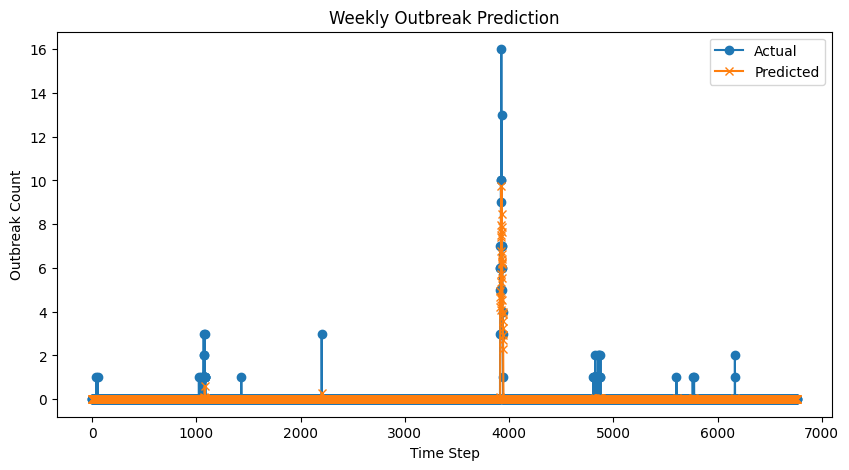

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


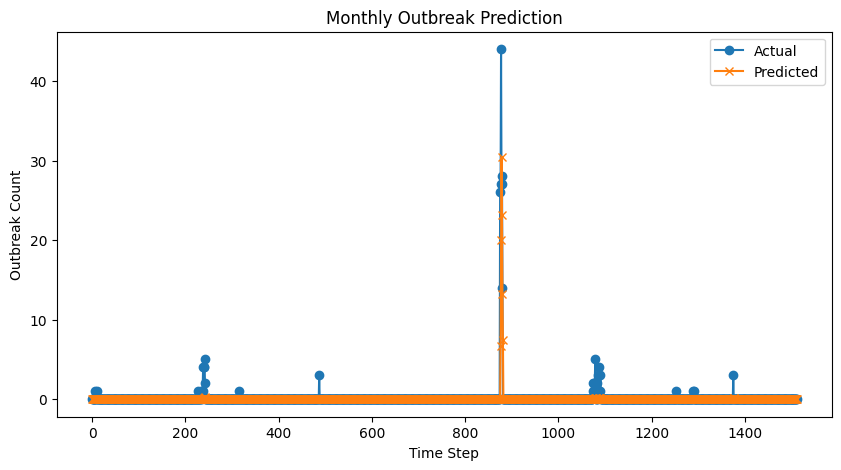

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


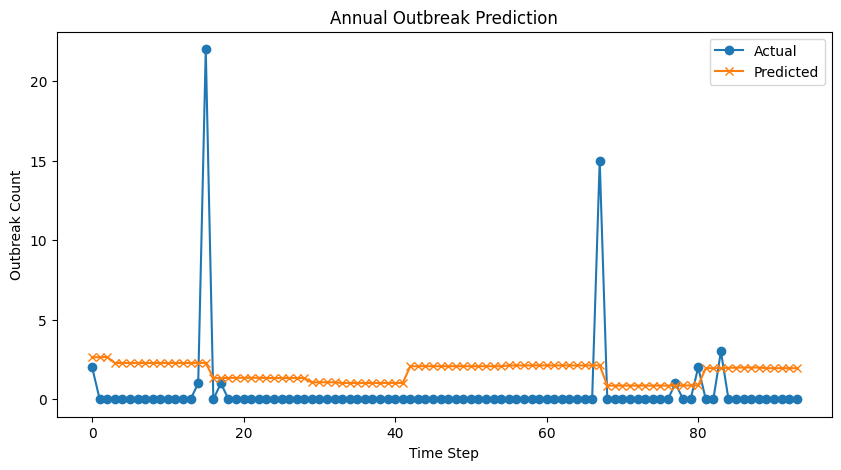

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---- Helper function to plot ----
def plot_actual_vs_predicted(model, X_test, y_test, title, scaler=None):
    # Predict
    y_pred = model.predict(X_test)

    # If scaled, inverse transform both
    if scaler is not None:
        # Pad with zeros for inverse_transform (if multi-feature scaling was used)
        n_features = X_test.shape[2]
        y_pred_padded = np.hstack((y_pred, np.zeros((len(y_pred), n_features-1))))
        y_test_padded = np.hstack((y_test.reshape(-1,1), np.zeros((len(y_test), n_features-1))))

        y_pred = scaler.inverse_transform(y_pred_padded)[:,0]
        y_test = scaler.inverse_transform(y_test_padded)[:,0]
    else:
        y_pred = y_pred.flatten()
        y_test = y_test.flatten()

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(y_test, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted", marker='x')
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Outbreak Count")
    plt.legend()
    plt.show()

    return y_test, y_pred


# ---- Plot for each timescale ----
weekly_actual, weekly_pred = plot_actual_vs_predicted(
    weekly_model, X_test_weekly, y_test_weekly,
    title="Weekly Outbreak Prediction",
    scaler=scaler_weekly  # set None if no scaling
)

monthly_actual, monthly_pred = plot_actual_vs_predicted(
    monthly_model, X_test_monthly, y_test_monthly,
    title="Monthly Outbreak Prediction",
    scaler=scaler_monthly
)

annual_actual, annual_pred = plot_actual_vs_predicted(
    annual_model, X_test_annually, y_test_annually,
    title="Annual Outbreak Prediction",
    scaler=scaler_annually
)


In [ ]:
import os

# Create a directory to save the global models
global_models_save_dir = "global_lstm_models"
os.makedirs(global_models_save_dir, exist_ok=True)

# Save the weekly model
weekly_model_save_path = os.path.join(global_models_save_dir, "global_weekly_model.keras")
weekly_model.save(weekly_model_save_path)
print(f"Weekly model saved to: {weekly_model_save_path}")

# Save the monthly model
monthly_model_save_path = os.path.join(global_models_save_dir, "global_monthly_model.keras")
monthly_model.save(monthly_model_save_path)
print(f"Monthly model saved to: {monthly_model_save_path}")

# Save the annual model
annual_model_save_path = os.path.join(global_models_save_dir, "global_annual_model.keras")
annual_model.save(annual_model_save_path)
print(f"Annual model saved to: {annual_model_save_path}")

Weekly model saved to: global_lstm_models/global_weekly_model.keras
Monthly model saved to: global_lstm_models/global_monthly_model.keras
Annual model saved to: global_lstm_models/global_annual_model.keras
